# DS 5500 Homework 2 Solutions

### importing required libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib.pylab import plt 
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
import seaborn as sns
import statsmodels.formula.api as sm
from statsmodels.tools.eval_measures import rmse
from mpl_toolkits.mplot3d import axes3d, Axes3D

### function to read csv file and get the information in a format useful for further analysis and visualization

In [2]:
def read_csv(csv_file_path1, investigating_column_name1, new_investigating_column_name1,
            csv_file_path2, investigating_column_name2, new_investigating_column_name2):
    
    #reading first data file
    csv_data1 = pd.read_csv(csv_file_path1)
    #removing any row that has a missing value(information)
    csv_data1 = csv_data1.dropna(how = 'any', 
                               axis = 0)
    csv_data1 = csv_data1.rename(columns = {'geo' : 'country_abv', 
                                          'time' : 'year', 
                                          investigating_column_name1 : new_investigating_column_name1})
    
    #reading second data file
    csv_data2 = pd.read_csv(csv_file_path2)
    #removing any row that has a missing value(information)
    csv_data2 = csv_data2.dropna(how = 'any', 
                               axis = 0)
    csv_data2 = csv_data2.rename(columns = {'geo' : 'country_abv',
                                            'time' : 'year', 
                                            investigating_column_name2 : new_investigating_column_name2})
    
    #combining both the datasets 
    csv_data = pd.merge(csv_data1, csv_data2, 
                                how = 'outer', 
                                on = ['country_abv', 'year'], 
                                validate = 'one_to_one').dropna(how = 'any', 
                                                                axis = 0)
    return csv_data

## Problem 4

#### obtaining the dataframe containing income and life expectancy information for each country and each year

In [3]:
#obtaining the GDP per capita and life expectancy data over time
gdp_per_capita_data_file_path = '/Users/bishishta_mukherjee/Documents/GitHub/Information-Visualization/DS5500_HW2/data_files/ddf_datapoints_gdppercapita_us_inflation_adjusted_by_geo_time.csv'
life_expectancy_data_file_path = '/Users/bishishta_mukherjee/Documents/GitHub/Information-Visualization/DS5500_HW2/data_files/ddf_datapoints_life_expectancy_years_by_geo_time.csv'

gdp_le_data = read_csv(gdp_per_capita_data_file_path,
                'gdppercapita_us_inflation_adjusted', 
                'gdp_per_capita',
                life_expectancy_data_file_path,
                'life_expectancy_years',
                'life_expectancy')

In [4]:
gdp_le_data['log_gdp_per_capita'] = np.log(gdp_le_data['gdp_per_capita'])

In [5]:
gdp_le_data[:5]

,country_abv,year,gdp_per_capita,life_expectancy,log_gdp_per_capita
0,abw,2010,24271.94042,75.06,10.097076
1,afg,2002,364.57057,52.43,5.898720
2,afg,2003,376.75871,53.03,5.931605
3,afg,2004,364.09544,53.50,5.897416
4,afg,2005,389.41636,53.87,5.964649


#### splitting data into train and test set

In [6]:
gdp_le_data_train, gdp_le_data_test = train_test_split(gdp_le_data, test_size=0.2)

### baseline model (Y = life expectancy, X1 = income, X2 = Year)

#### checking for linearity between Y and X1, X2 using scatterplots

<Figure size 432x288 with 0 Axes>

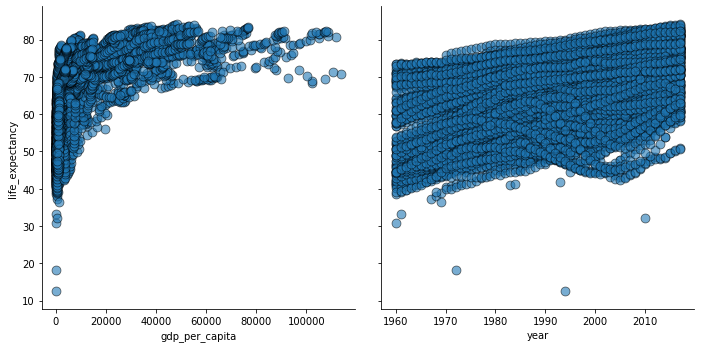

In [7]:
plt.figure()
sns.pairplot(gdp_le_data, x_vars=['gdp_per_capita','year'], 
             y_vars='life_expectancy', 
             height = 5, 
             plot_kws = {'alpha': 0.6, 
                         's': 80, 
                         'edgecolor': 'k'})
plt.savefig("solution_figures/q4_baseline_pair_plot.png")

#### fitting the regression model

In [8]:
q4_baseline_model = sm.ols(formula="life_expectancy ~ gdp_per_capita + year",
                           data = gdp_le_data_train).fit()

#### getting model stats

In [9]:
q4_baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     2774.
Date:                Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:37:22   Log-Likelihood:                -23898.
No. Observations:                6967   AIC:                         4.780e+04
Df Residuals:                    6964   BIC:                         4.782e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -374.4835     11.384    -32.897      0.000    -396.799    -352.168
gdp_per_capita     0.0003   5.72e-06     56.724      0.000       0.000       0.000
year               0.2194      0.006     38.377      0.000       0.208       0.231
==============================================================================
Omnibus:                      480.332   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              585.972
Skew:                          -0.710   Prob(JB):                    5.73e-128
Kurtosis:                       3.051   Cond. No.                     2.43e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### finding rmse for train and test set predictions made by model

In [10]:
q4_baseline_model_pred_train = q4_baseline_model.predict(gdp_le_data_train)
q4_baseline_model_pred = q4_baseline_model.predict(gdp_le_data_test)

print('train set rmse : ' +  str(rmse(gdp_le_data_train['life_expectancy'], 
                                      q4_baseline_model_pred_train, axis=0)))
print('test set rmse : ' +  str(rmse(gdp_le_data_test['life_expectancy'], 
                                     q4_baseline_model_pred, axis=0)))

train set rmse : 7.472921420932317
test set rmse : 7.369321906205177


### final model (Y = life expectancy, X1 = log(income), X2 = Year)

#### checking for linearity between Y and X1, X2 using scatterplots

<Figure size 432x288 with 0 Axes>

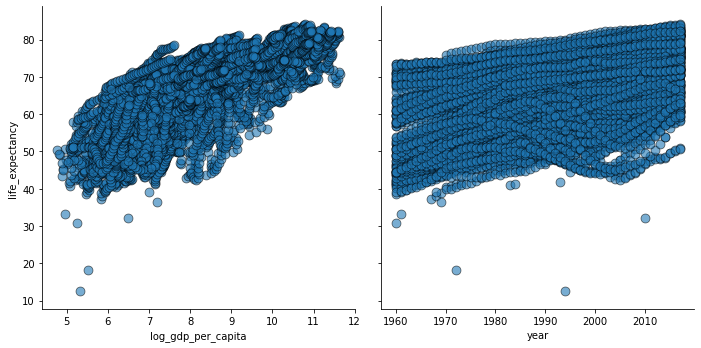

In [11]:
plt.figure()
sns.pairplot(gdp_le_data, x_vars=['log_gdp_per_capita', 'year'], 
             y_vars='life_expectancy', 
             height = 5, 
             plot_kws = {'alpha': 0.6, 
                         's': 80, 
                         'edgecolor': 'k'})
plt.savefig("solution_figures/q4_pair_plot.png")

#### fitting the regression model

In [12]:
q4_model = sm.ols(formula="life_expectancy ** 2 ~ log_gdp_per_capita + year",
                           data = gdp_le_data_train).fit()

#### getting model stats

In [13]:
q4_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     8166.
Date:                Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:37:23   Log-Likelihood:                -21733.
No. Observations:                6967   AIC:                         4.347e+04
Df Residuals:                    6964   BIC:                         4.349e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -354.7797      8.313    -42.679      0.000    -371.075    -338.484
log_gdp_per_capita     4.7666      0.044    109.510      0.000       4.681       4.852
year                   0.1916      0.004     45.625      0.000       0.183       0.200
==============================================================================
Omnibus:                      815.483   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1556.125
Skew:                          -0.760   Prob(JB):                         0.00
Kurtosis:                       4.746   Cond. No.                     2.52e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### getting model params

In [14]:
q4_model.params

Intercept            -354.779707
log_gdp_per_capita      4.766643
year                    0.191614
dtype: float64

#### finding rmse for train and test set predictions made by model

In [15]:
q4_model_pred_train = q4_model.predict(gdp_le_data_train)
q4_model_pred = q4_model.predict(gdp_le_data_test)

print('train set rmse : ' +  str(rmse(gdp_le_data_train['life_expectancy'], 
                                      q4_model_pred_train, axis=0)))
print('test set rmse : ' +  str(rmse(gdp_le_data_test['life_expectancy'], 
                                     q4_model_pred, axis=0)))

train set rmse : 5.476707475376551
test set rmse : 5.260212159486325


#### residuals vs fitted plot

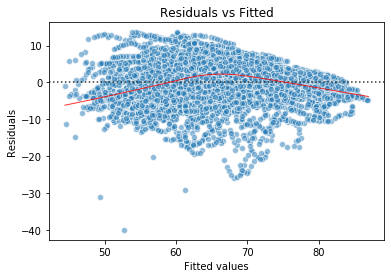

In [16]:
q4_residual_plot = plt.figure()
q4_residual_plot.axes[0] = sns.residplot(q4_model_pred_train, 
                                  gdp_le_data_train['life_expectancy'], 
                                  data = gdp_le_data_train,
                                  lowess = True,
                                  scatter_kws = {'alpha': 0.5, 'edgecolor': 'white'},
                                  line_kws = {'color': 'red', 'lw': 1, 'alpha': 0.8})

q4_residual_plot.axes[0].set_title('Residuals vs Fitted')
q4_residual_plot.axes[0].set_xlabel('Fitted values')
q4_residual_plot.axes[0].set_ylabel('Residuals')
q4_residual_plot.savefig('solution_figures/q4_residuslvsfitted.png')

#### actual vs fitted values plot

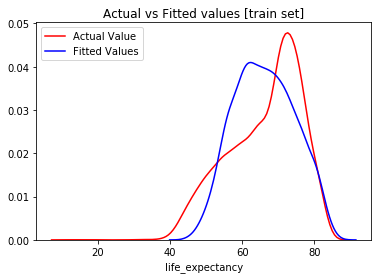

In [17]:
plt.figure()
ax1 = sns.distplot(gdp_le_data_train['life_expectancy'], 
                   hist=False, 
                   color="r", 
                   label="Actual Value")
sns.distplot(q4_model_pred_train, 
             hist=False, 
             color="b", 
             label="Fitted Values" , 
             ax=ax1)
ax1.set_title('Actual vs Fitted values [train set]')
ax1.set_xlabel('life_expectancy')
plt.savefig('solution_figures/q4_actualvsfitted_train.png')

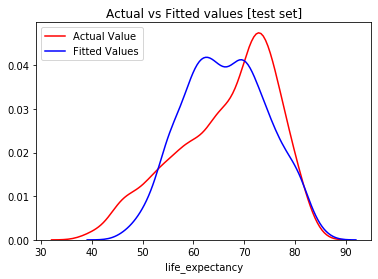

In [18]:
plt.figure()
ax1 = sns.distplot(gdp_le_data_test['life_expectancy'], 
                   hist=False, 
                   color="r", 
                   label="Actual Value")
sns.distplot(q4_model_pred, 
             hist=False, 
             color="b", 
             label="Fitted Values" , 
             ax=ax1)
ax1.set_title('Actual vs Fitted values [test set]')
ax1.set_xlabel('life_expectancy')
plt.savefig('solution_figures/q4_actualvsfitted_test.png')

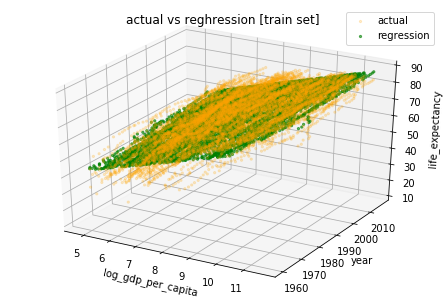

In [19]:
fig = plt.figure()
ax = Axes3D(fig)
  
ax.scatter(gdp_le_data_train['log_gdp_per_capita'], 
           gdp_le_data_train['year'], 
           gdp_le_data_train['life_expectancy'], 
           label ='actual',
           s = 5, 
           color ="orange",
          alpha = 0.2) 
  
ax.scatter(gdp_le_data_train['log_gdp_per_capita'], 
           gdp_le_data_train['year'], 
           q4_model_pred_train,
           label ='regression', 
           s = 5, 
           color ="green",
          alpha = 0.6) 
  
ax.legend() 
ax.set_title('actual vs reghression [train set]')
ax.set_xlabel('log_gdp_per_capita')
ax.set_ylabel('year')
ax.set_zlabel('life_expectancy')
fig.savefig('solution_figures/q4_actualvsregression_train.png') 

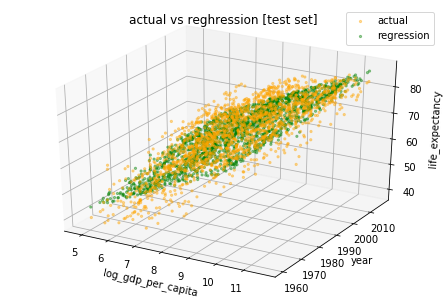

In [20]:
fig = plt.figure()
ax = Axes3D(fig)
  
ax.scatter(gdp_le_data_test['log_gdp_per_capita'], 
           gdp_le_data_test['year'], 
           gdp_le_data_test['life_expectancy'], 
           label ='actual',
           s = 5, 
           color ="orange",
          alpha = 0.4) 
  
ax.scatter(gdp_le_data_test['log_gdp_per_capita'], 
           gdp_le_data_test['year'], 
           q4_model_pred,
           label ='regression', 
           s = 5, 
           color ="green",
          alpha = 0.4) 
  
ax.legend()
ax.set_title('actual vs reghression [test set]')
ax.set_xlabel('log_gdp_per_capita')
ax.set_ylabel('year')
ax.set_zlabel('life_expectancy')
fig.savefig('solution_figures/q4_actualvsregression_test.png')

## Problem 5

#### obtaining the dataframe containing income and child mortality information for each country and each year

In [21]:
#obtaining the GDP per capita and life expectancy data over time
gdp_per_capita_data_file_path = '/Users/bishishta_mukherjee/Documents/GitHub/Information-Visualization/DS5500_HW2/data_files/ddf_datapoints_gdppercapita_us_inflation_adjusted_by_geo_time.csv'
child_mortality_data_file_path = '/Users/bishishta_mukherjee/Documents/GitHub/Information-Visualization/DS5500_HW2/data_files/ddf_datapoints_child_mortality_0_5_year_olds_dying_per_1000_born_by_geo_time.csv'

gdp_cm_data = read_csv(gdp_per_capita_data_file_path,
                       'gdppercapita_us_inflation_adjusted',
                       'gdp_per_capita',
                       child_mortality_data_file_path,
                       'child_mortality_0_5_year_olds_dying_per_1000_born',
                       'child_mortality_rate')

In [22]:
gdp_cm_data['log_gdp_per_capita'] = np.log(gdp_cm_data['gdp_per_capita'])
gdp_cm_data['log_child_mortality_rate'] = np.log(gdp_cm_data['child_mortality_rate'] )

In [23]:
gdp_cm_data[:5]

,country_abv,year,gdp_per_capita,child_mortality_rate,log_gdp_per_capita,log_child_mortality_rate
0,abw,2010,24271.94042,17.969,10.097076,2.888648
1,afg,2002,364.57057,122.200,5.898720,4.805659
2,afg,2003,376.75871,118.300,5.931605,4.773224
3,afg,2004,364.09544,114.400,5.897416,4.739701
4,afg,2005,389.41636,110.300,5.964649,4.703204


#### splitting the data into train and test set

In [24]:
gdp_cm_data_train, gdp_cm_data_test = train_test_split(gdp_cm_data, test_size=0.2)

### baseline model (Y = child mortality rate, X1 = income ( GDP per capita ), X2 = Year)

#### checking for linearity

<Figure size 432x288 with 0 Axes>

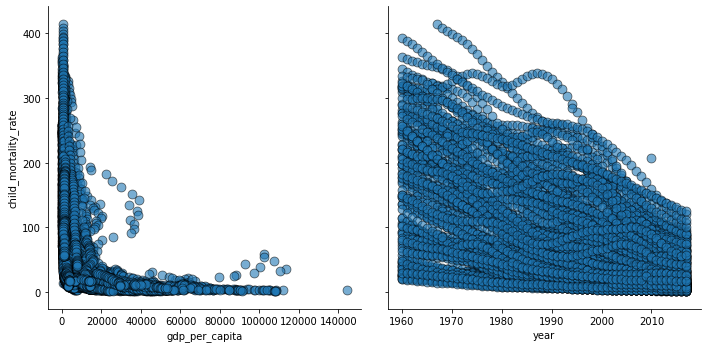

In [25]:
plt.figure()
sns.pairplot(gdp_cm_data, x_vars=['gdp_per_capita', 'year'], 
             y_vars='child_mortality_rate', 
             height = 5, 
             plot_kws = {'alpha': 0.6, 
                         's': 80, 
                         'edgecolor': 'k'})
plt.savefig("solution_figures/q5_baseline_pair_plot.png")

#### fitting the regression model

In [26]:
q5_baseline_model = sm.ols(formula="child_mortality_rate ~ gdp_per_capita + year",
                           data = gdp_cm_data_train).fit()

#### getting the model stats

In [27]:
q5_baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     child_mortality_rate   R-squared:                       0.378
Model:                              OLS   Adj. R-squared:                  0.378
Method:                   Least Squares   F-statistic:                     2115.
Date:                  Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                          15:37:30   Log-Likelihood:                -38415.
No. Observations:                  6952   AIC:                         7.684e+04
Df Residuals:                      6949   BIC:                         7.686e+04
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4062.1253     92.522     43.904      0.000    3880.754    4243.497
gdp_per_capita    -0.0020   4.89e-05    -41.214      0.000      -0.002      -0.002
year              -1.9911      0.046    -42.845      0.000      -2.082      -1.900
==============================================================================
Omnibus:                      931.721   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1369.504
Skew:                           0.996   Prob(JB):                    4.13e-298
Kurtosis:                       3.871   Cond. No.                     2.31e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### #### finding rmse for train and train set predictions made by model

In [28]:
q5_baseline_model_pred_train = q5_baseline_model.predict(gdp_cm_data_train)
q5_baseline_model_pred = q5_baseline_model.predict(gdp_cm_data_test)

print('train set rmse : ' +  str(rmse(gdp_cm_data_train['child_mortality_rate'], 
                                      q5_baseline_model_pred_train, axis=0)))
print('test set rmse : ' +  str(rmse(gdp_cm_data_test['child_mortality_rate'], 
                                     q5_baseline_model_pred, axis=0)))

train set rmse : 60.754288879567824
test set rmse : 62.62511804270361


### final model (Y = log(child mortality rate), X1 = log(income ( GDP per capita )), X2 = Year)

#### checking for linearity

<Figure size 432x288 with 0 Axes>

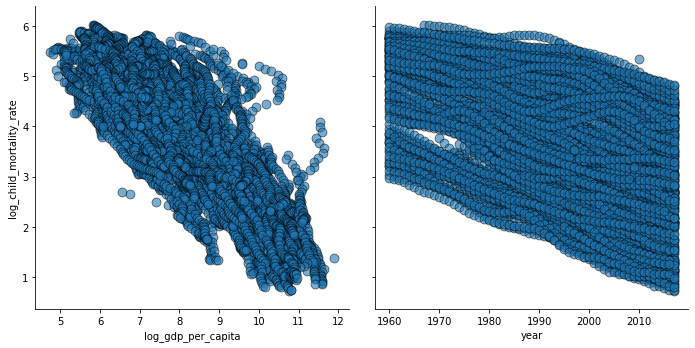

In [29]:
plt.figure()
sns.pairplot(gdp_cm_data, x_vars=['log_gdp_per_capita', 'year'], 
             y_vars='log_child_mortality_rate', 
             height = 5, 
             plot_kws = {'alpha': 0.6, 
                         's': 80, 
                         'edgecolor': 'k'})
plt.savefig("solution_figures/q5_pair_plot.png")

#### fitting the regression model

In [30]:
q5_model = sm.ols(formula="log_child_mortality_rate ~ log_gdp_per_capita + year",
                           data = gdp_cm_data_train).fit()

#### getting model stats

In [31]:
q5_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     log_child_mortality_rate   R-squared:                       0.809
Model:                                  OLS   Adj. R-squared:                  0.809
Method:                       Least Squares   F-statistic:                 1.475e+04
Date:                      Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                              15:37:31   Log-Likelihood:                -5482.1
No. Observations:                      6952   AIC:                         1.097e+04
Df Residuals:                          6949   BIC:                         1.099e+04
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             61.4889      0.807     76.203      0.000      59.907      63.071
log_gdp_per_capita    -0.6269      0.004   -145.750      0.000      -0.635      -0.618
year                  -0.0264      0.000    -64.843      0.000      -0.027      -0.026
==============================================================================
Omnibus:                      358.171   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              547.461
Skew:                           0.450   Prob(JB):                    1.32e-119
Kurtosis:                       4.039   Cond. No.                     2.52e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### getting model parameters

In [32]:
q5_model.params

Intercept             61.488925
log_gdp_per_capita    -0.626907
year                  -0.026428
dtype: float64

#### finding rmse for train and train set predictions made by model

In [33]:
q5_model_pred_train = q5_model.predict(gdp_cm_data_train)
q5_model_pred = q5_model.predict(gdp_cm_data_test)

print('train set rmse : ' +  str(rmse(gdp_cm_data_train['log_child_mortality_rate'], 
                                      q5_model_pred_train, axis=0)))
print('test set rmse : ' +  str(rmse(gdp_cm_data_test['log_child_mortality_rate'], 
                                     q5_model_pred, axis=0)))

train set rmse : 0.5323952384693215
test set rmse : 0.5521306906082895


#### residuals vs fitted plot

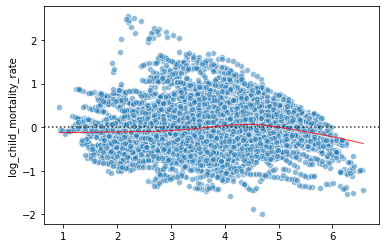

In [34]:
q5_residual_plot = plt.figure()
q5_residual_plot.axes[0] = sns.residplot(q5_model_pred_train, 
                                  gdp_cm_data_train['log_child_mortality_rate'], 
                                  data = gdp_cm_data_train,
                                  lowess = True,
                                  scatter_kws = {'alpha': 0.5, 'edgecolor': 'white'},
                                  line_kws = {'color': 'red', 'lw': 1, 'alpha': 0.8})

q4_residual_plot.axes[0].set_title('Residuals vs Fitted')
q4_residual_plot.axes[0].set_xlabel('Fitted values')
q4_residual_plot.axes[0].set_ylabel('Residuals')
q5_residual_plot.savefig('solution_figures/q5_residualsvsfitted.png')

#### actual vs fitted values plot

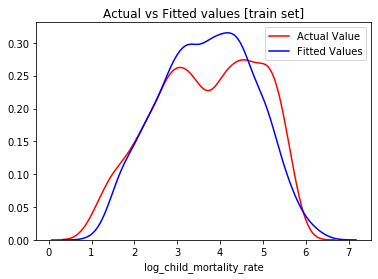

In [35]:
ax1 = sns.distplot(gdp_cm_data_train['log_child_mortality_rate'], 
                   hist=False, 
                   color="r", 
                   label="Actual Value")
sns.distplot(q5_model_pred_train, 
             hist=False, 
             color="b", 
             label="Fitted Values" , 
             ax=ax1)
ax1.set_title('Actual vs Fitted values [train set]')
ax1.set_xlabel('log_child_mortality_rate')
plt.savefig('solution_figures/q5_actualsvsfitted_train.png')

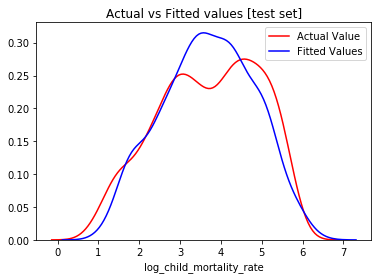

In [36]:
ax1 = sns.distplot(gdp_cm_data_test['log_child_mortality_rate'], 
                   hist=False, 
                   color="r", 
                   label="Actual Value")
sns.distplot(q5_model_pred, 
             hist=False, 
             color="b", 
             label="Fitted Values" , 
             ax=ax1)
ax1.set_title('Actual vs Fitted values [test set]')
ax1.set_xlabel('log_child_mortality_rate')
plt.savefig('solution_figures/q5_actualsvsfitted_test.png')

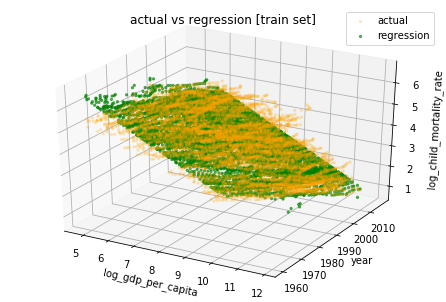

In [37]:
fig = plt.figure()
ax = Axes3D(fig)
  
ax.scatter(gdp_cm_data_train['log_gdp_per_capita'], 
           gdp_cm_data_train['year'], 
           gdp_cm_data_train['log_child_mortality_rate'], 
           label ='actual',
           s = 5, 
           color ="orange",
          alpha = 0.2) 
  
ax.scatter(gdp_cm_data_train['log_gdp_per_capita'], 
           gdp_cm_data_train['year'], 
           q5_model_pred_train,
           label ='regression', 
           s = 5, 
           color ="green",
          alpha = 0.6) 
  
ax.legend() 
ax.set_title('actual vs regression [train set]')
ax.set_xlabel('log_gdp_per_capita')
ax.set_ylabel('year')
ax.set_zlabel('log_child_mortality_rate')
plt.savefig('solution_figures/q5_actualsvsregression_train.png')

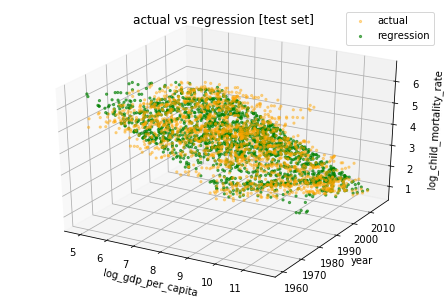

In [38]:
fig = plt.figure()
ax = Axes3D(fig)
  
ax.scatter(gdp_cm_data_test['log_gdp_per_capita'], 
           gdp_cm_data_test['year'], 
           gdp_cm_data_test['log_child_mortality_rate'], 
           label ='actual',
           s = 5, 
           color ="orange",
          alpha = 0.4) 
  
ax.scatter(gdp_cm_data_test['log_gdp_per_capita'], 
           gdp_cm_data_test['year'], 
           q5_model_pred,
           label ='regression', 
           s = 5, 
           color ="green",
          alpha = 0.6) 
  
ax.legend()
ax.set_title('actual vs regression [test set]')
ax.set_xlabel('log_gdp_per_capita')
ax.set_ylabel('year')
ax.set_zlabel('log_child_mortality_rate')
plt.savefig('solution_figures/q5_actualsvsregression_test.png') 